In [2]:
#데이터 둘러보기
import pandas as pd
import numpy as np 

train = pd.read_csv('trainby.csv')
test = pd.read_csv('testby.csv')

In [3]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


- 자전거 수요 예측 
- season 1 봄, 2 여름, 3 가을, 4 겨울
- holiday 0, 1 공휴일 여부 (0 공휴일 아니고, 1 공휴일)
- weather ( 1 맑음, 2 옅은 안개, 3 약간의 눈, 비와 천둥, 4 폭풍 천둥 -> 날씨가 클수록 안 좋다.
- atemp 체감온도
- humidity 상대 습도
- windspeed 풍속
- casual 등록되지 않은 사용자 수 
- registered 등록된 사용자 수 
- count 자전거 대여 수량 

- datetime 사용해서 여러 파생변수 만들 수 있다.
- 월, 일 
- 계절의 영향 

In [11]:
train['date']=train['datetime'].apply(lambda x:x.split()[0])

# 연도, 월, 일, 시, 분, 초 데이터 뽑기
train['year']=train['datetime'].apply(lambda x:x.split()[0].split('-')[0])
train['month']=train['datetime'].apply(lambda x:x.split()[0].split('-')[1])
train['day']=train['datetime'].apply(lambda x:x.split()[0].split('-')[2])
train['hour']=train['datetime'].apply(lambda x:x.split()[1].split(':')[0])
train['minute']=train['datetime'].apply(lambda x:x.split()[1].split(':')[1])
train['second']=train['datetime'].apply(lambda x:x.split()[1].split(':')[2])

- 요일 피처 만들기 

In [18]:
from datetime import datetime
import calendar

In [20]:
train['weekday']=train['date'].apply(lambda dateString:calendar.day_name[datetime.strptime(dateString,"%Y-%m-%d").weekday()])

- season 1 봄, 2 여름, 3 가을, 4 겨울
- holiday 0, 1 공휴일 여부 (0 공휴일 아니고, 1 공휴일)
- weather ( 1 맑음, 2 옅은 안개, 3 약간의 눈, 비와 천둥, 4 폭풍 천둥 -> 날씨가 클수록 안 좋다.

In [22]:
train['season'] = train['season'].map({1:'Spring',
                                      2:'Summer',
                                      3:'Fall',
                                      4:'Winter'})
train['weather'] = train['weather'].map({1:'Clear',
                                      2:'Mist',
                                      3:'Light Snow',
                                      4:'Thunderstom'})

In [23]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,minute,second,weekday
0,2011-01-01 00:00:00,Spring,0,0,Clear,9.84,14.395,81,0.0000,3,13,16,2011-01-01,2011,01,01,00,00,00,Saturday
1,2011-01-01 01:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0000,8,32,40,2011-01-01,2011,01,01,01,00,00,Saturday
2,2011-01-01 02:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0000,5,27,32,2011-01-01,2011,01,01,02,00,00,Saturday
3,2011-01-01 03:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0000,3,10,13,2011-01-01,2011,01,01,03,00,00,Saturday
4,2011-01-01 04:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0000,0,1,1,2011-01-01,2011,01,01,04,00,00,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,Winter,0,1,Clear,15.58,19.695,50,26.0027,7,329,336,2012-12-19,2012,12,19,19,00,00,Wednesday
10882,2012-12-19 20:00:00,Winter,0,1,Clear,14.76,17.425,57,15.0013,10,231,241,2012-12-19,2012,12,19,20,00,00,Wednesday
10883,2012-12-19 21:00:00,Winter,0,1,Clear,13.94,15.910,61,15.0013,4,164,168,2012-12-19,2012,12,19,21,00,00,Wednesday
10884,2012-12-19 22:00:00,Winter,0,1,Clear,13.94,17.425,61,6.0032,12,117,129,2012-12-19,2012,12,19,22,00,00,Wednesday


In [24]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt


- 수치형 데이터들의 분포를 확인

- count, 
- casual
- registered

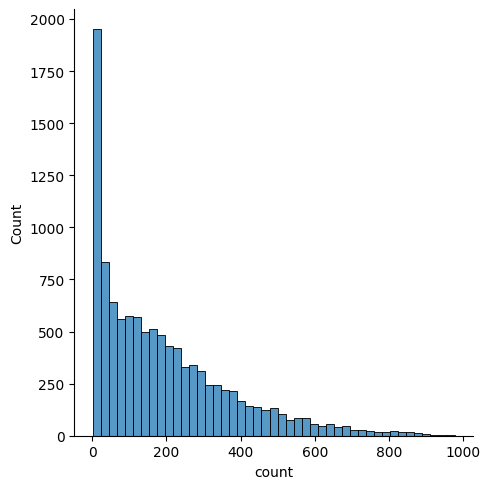

In [25]:
sns.displot(train['count'])

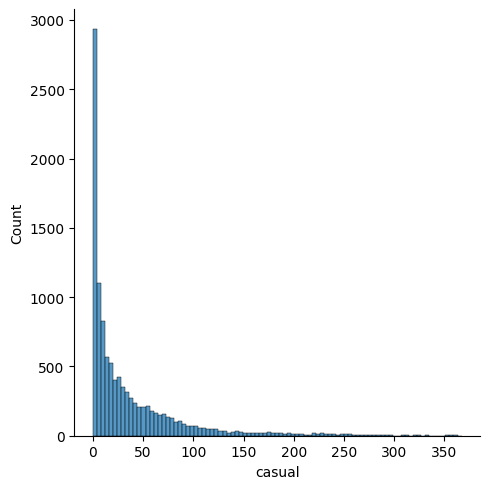

In [26]:
sns.displot(train['casual'])

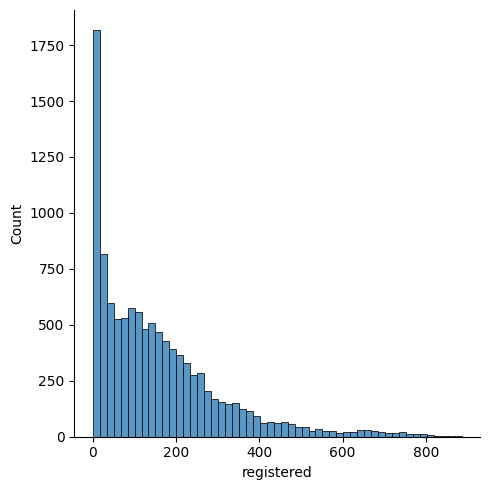

In [27]:
sns.displot(train['registered'])

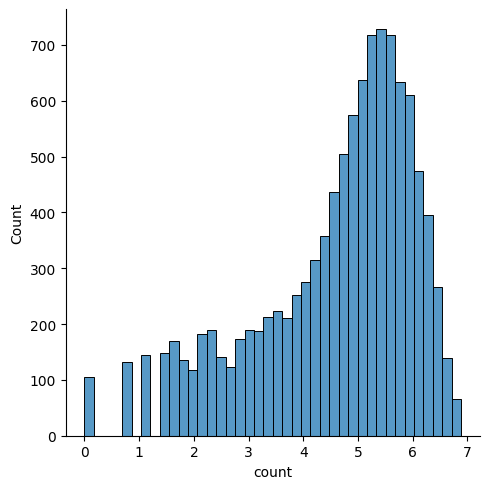

In [28]:
sns.displot(np.log(train['count']))

<Axes: xlabel='second', ylabel='count'>

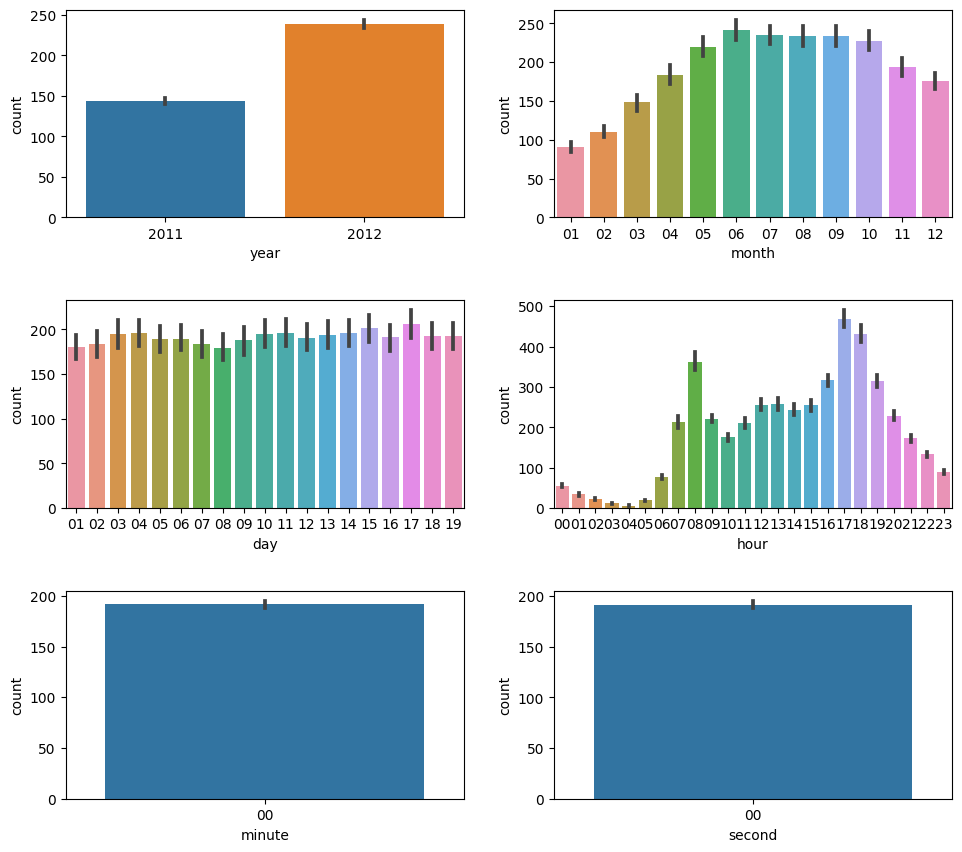

In [35]:
# 날씨랑 count 영향을 줄것이다. 가설-> 해당 피처들이 count 영향을 줄 것이니 중요한 피처라고 볼 수 있는지

figure, axes = plt.subplots(nrows=3, ncols=2)
plt.tight_layout() # 겹치는 x축들 정리
figure.set_size_inches(10,9)

## 위에서  추출한 date 를 가지고 데이터 확인

# 각 축에 서브플롯을 할당 진행

sns.barplot(x='year', y='count', data=train, ax=axes[0,0])
sns.barplot(x='month', y='count', data=train, ax=axes[0,1])
sns.barplot(x='day', y='count', data=train, ax=axes[1,0])
sns.barplot(x='hour', y='count', data=train, ax=axes[1,1])
sns.barplot(x='minute', y='count', data=train, ax=axes[2,0])
sns.barplot(x='second', y='count', data=train, ax=axes[2,1])

- 범주형 데이터에 따른 수치형 데이터 정보 확인하기! 
- boxplot  어떤 식으로 이상치들이 있는지 등을 확인하기 

In [38]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,minute,second,weekday
0,2011-01-01 00:00:00,Spring,0,0,Clear,9.84,14.395,81,0.0000,3,13,16,2011-01-01,2011,01,01,00,00,00,Saturday
1,2011-01-01 01:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0000,8,32,40,2011-01-01,2011,01,01,01,00,00,Saturday
2,2011-01-01 02:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0000,5,27,32,2011-01-01,2011,01,01,02,00,00,Saturday
3,2011-01-01 03:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0000,3,10,13,2011-01-01,2011,01,01,03,00,00,Saturday
4,2011-01-01 04:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0000,0,1,1,2011-01-01,2011,01,01,04,00,00,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,Winter,0,1,Clear,15.58,19.695,50,26.0027,7,329,336,2012-12-19,2012,12,19,19,00,00,Wednesday
10882,2012-12-19 20:00:00,Winter,0,1,Clear,14.76,17.425,57,15.0013,10,231,241,2012-12-19,2012,12,19,20,00,00,Wednesday
10883,2012-12-19 21:00:00,Winter,0,1,Clear,13.94,15.910,61,15.0013,4,164,168,2012-12-19,2012,12,19,21,00,00,Wednesday
10884,2012-12-19 22:00:00,Winter,0,1,Clear,13.94,17.425,61,6.0032,12,117,129,2012-12-19,2012,12,19,22,00,00,Wednesday


<Axes: xlabel='workingday', ylabel='count'>

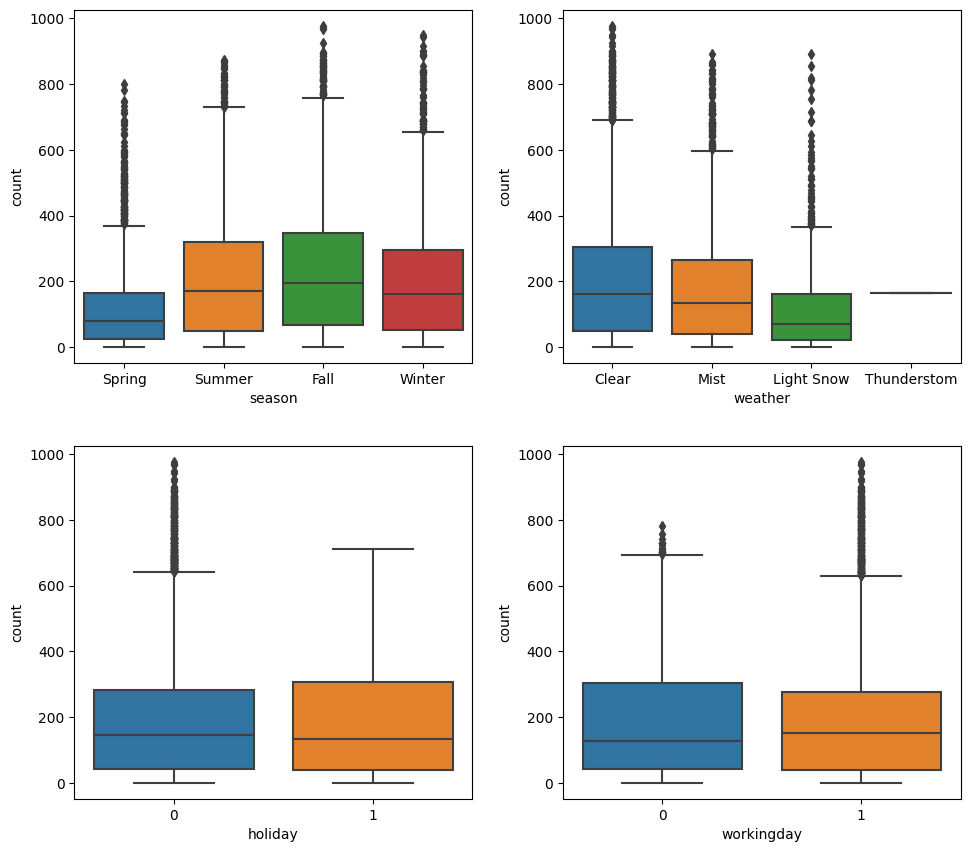

In [39]:
figure, axes = plt.subplots(nrows=2, ncols=2)
plt.tight_layout() # 겹치는 x축들 정리
figure.set_size_inches(10,9)

sns.boxplot(x='season',y='count', data=train, ax=axes[0,0])
sns.boxplot(x='weather',y='count', data=train, ax=axes[0,1])
sns.boxplot(x='holiday',y='count', data=train, ax=axes[1,0])
sns.boxplot(x='workingday',y='count', data=train, ax=axes[1,1])

- x축을 시간으로 보고 Y값의 변화는?

<Axes: xlabel='hour', ylabel='count'>

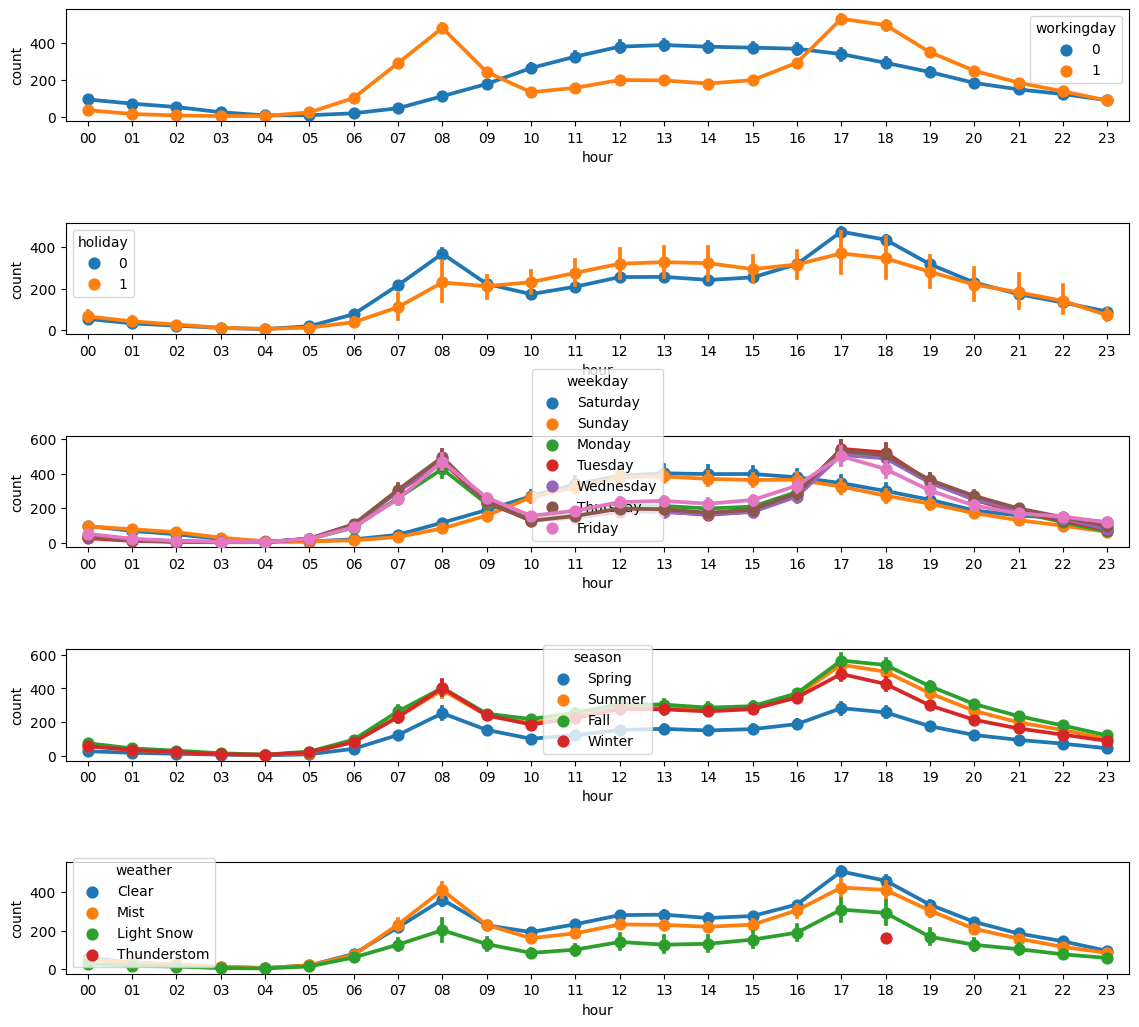

In [47]:
figure, axes = plt.subplots(nrows=5)
plt.tight_layout() # 겹치는 x축들 정리
figure.set_size_inches(12,11)

sns.pointplot(x='hour', y='count',data= train, hue='workingday' , ax=axes[0])
sns.pointplot(x='hour', y='count',data= train, hue='holiday' , ax=axes[1])
sns.pointplot(x='hour', y='count',data= train, hue='weekday' , ax=axes[2])
sns.pointplot(x='hour', y='count',data= train, hue='season' , ax=axes[3])
sns.pointplot(x='hour', y='count',data= train, hue='weather' , ax=axes[4])

- 피처들간의 영향도 확인
- 'temp'
- 'atemp'
- 'windspeed'
- 'humidity

- 산점도를 통한 y값의 관계 확인

<Axes: xlabel='humidity', ylabel='count'>

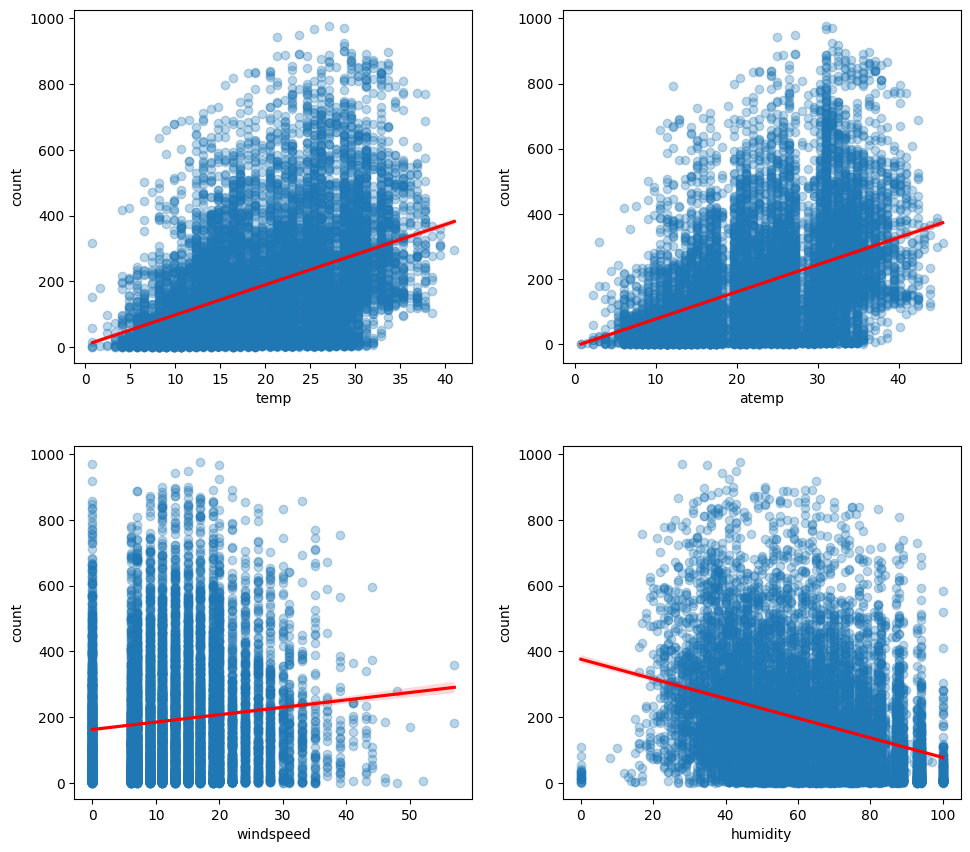

In [51]:
figure, axes = plt.subplots(nrows=2, ncols=2)
plt.tight_layout() # 겹치는 x축들 정리
figure.set_size_inches(10,9)


sns.regplot(x='temp',y='count',data=train, ax= axes[0,0], scatter_kws ={'alpha':0.3}, line_kws = {'color':'red'})
sns.regplot(x='atemp',y='count',data=train, ax= axes[0,1], scatter_kws ={'alpha':0.3}, line_kws = {'color':'red'})
sns.regplot(x='windspeed',y='count',data=train, ax= axes[1,0], scatter_kws ={'alpha':0.3}, line_kws = {'color':'red'})
sns.regplot(x='humidity',y='count',data=train, ax= axes[1,1], scatter_kws ={'alpha':0.3}, line_kws = {'color':'red'})

In [52]:
##히트맵 상관계수 확인 

train[['temp','atemp','humidity','windspeed','count']].corr()

,temp,atemp,humidity,windspeed,count
temp,1.000000,0.984948,-0.064949,-0.017852,0.394454
atemp,0.984948,1.000000,-0.043536,-0.057473,0.389784
humidity,-0.064949,-0.043536,1.000000,-0.318607,-0.317371
windspeed,-0.017852,-0.057473,-0.318607,1.000000,0.101369
count,0.394454,0.389784,-0.317371,0.101369,1.000000


<Axes: >

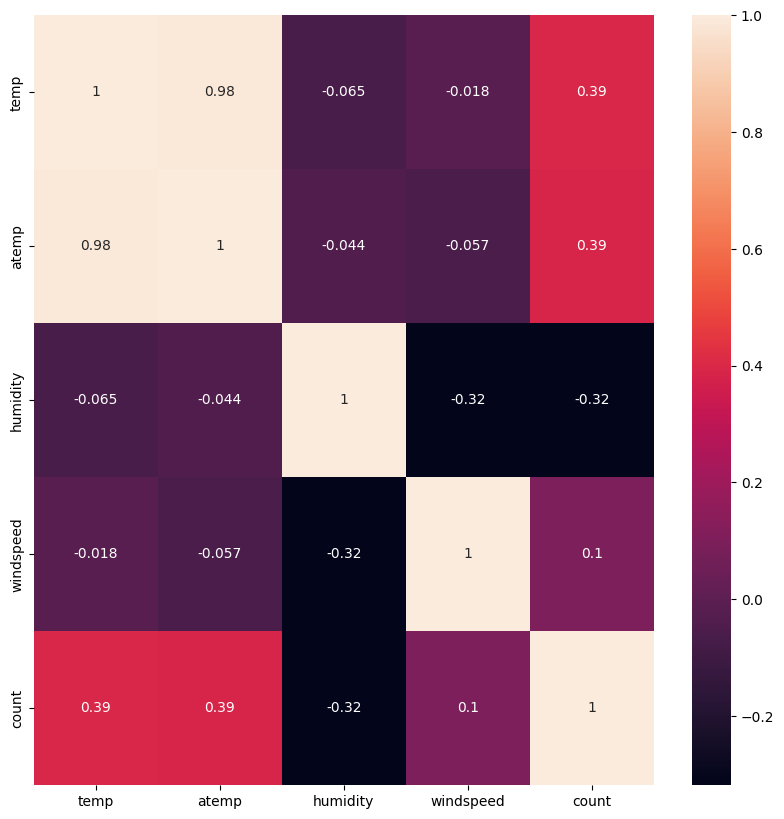

In [54]:
corrmat=train[['temp','atemp','humidity','windspeed','count']].corr()

fig, ax = plt.subplots()
fig.set_size_inches(10,10)
sns.heatmap(corrmat, annot=True)

- train을 모델링 진행 

In [57]:
train =train[train['weather']!=4]

- 삭제해야 하는 피처 registered,casual, datetime, date, month, windspeed, weekday

In [65]:
drop_features = ['registered','casual','datetime','date','month','windspeed','weekday']

In [66]:
train_fin =train.drop(drop_features, axis=1)

In [67]:
train_fin['season'] = train_fin['season'].map({'Spring':1,
                                      'Summer':2,
                                      'Fall':3,
                                      'Winter':4})
train_fin['weather'] = train_fin['weather'].map({'Clear':1,
                                      'Mist':2,
                                      'Light Snow':3,
                                      'Thunderstom':4})

In [68]:
# 
train_fin


,season,holiday,workingday,weather,temp,atemp,humidity,count,year,day,hour,minute,second
0,1,0,0,1,9.84,14.395,81,16,2011,01,00,00,00
1,1,0,0,1,9.02,13.635,80,40,2011,01,01,00,00
2,1,0,0,1,9.02,13.635,80,32,2011,01,02,00,00
3,1,0,0,1,9.84,14.395,75,13,2011,01,03,00,00
4,1,0,0,1,9.84,14.395,75,1,2011,01,04,00,00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,336,2012,19,19,00,00
10882,4,0,1,1,14.76,17.425,57,241,2012,19,20,00,00
10883,4,0,1,1,13.94,15.910,61,168,2012,19,21,00,00
10884,4,0,1,1,13.94,17.425,61,129,2012,19,22,00,00


In [73]:
from sklearn.model_selection import train_test_split

In [75]:
train_fin_X=train_fin[['season','holiday','workingday','weather','temp','atemp']]

In [76]:
X_train, X_test, y_train, y_test = train_test_split(train_fin_X, train_fin['count'],test_size=0.3, random_state=111)

In [70]:
from sklearn.linear_model import LinearRegression

ln_reg_model = LinearRegression()

In [77]:
ln_reg_model.fit(X_train, y_train)

LinearRegression()

In [78]:
pred_train= ln_reg_model.predict(X_train)

In [79]:
pred_train

array([261.34515095, 214.75774893, 117.44201454, ..., 198.25094531,
       214.90560772, 132.0008149 ])

In [80]:
pred_test=ln_reg_model.predict(X_test)

In [81]:
pred_test

array([350.13095484, 216.24820424, 134.76758568, ..., 292.3813992 ,
       117.6005831 , 147.69026659])

In [82]:
from sklearn.metrics import mean_squared_error

In [86]:
# mse 를 확인

mse_train=mean_squared_error(y_true = y_train, y_pred=ln_reg_model.predict(X_train))
mse_test=mean_squared_error(y_true = y_test, y_pred=ln_reg_model.predict(X_test))

In [87]:
print(mse_train)
print(mse_test)

27151.558151747526
27280.76790193445
